In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# SPATIAL AGGREGATIONS

In [3]:
#Q1
#Which state (consider all stations in that state) has the highest average PM2.5 concentration across all stations and across all years?

file = pd.read_csv('Data.csv')
avg = file.groupby('state')['PM2.5'].mean().idxmax()

print(avg)

Delhi


In [4]:
#Q2
#Which state (consider all stations in that state) had the most days with hazardous PM2.5 levels (above 300 µg/m³) for the year 2023?

data_file = pd.read_csv('Data.csv')

most_hazardous = data_file['PM2.5'] > 300
data_2023 = data_file['Timestamp'].str.contains('2023')

combined = most_hazardous & data_2023

filtered_data = data_file[combined]
lst_state_w_most_haz = filtered_data.groupby('state')['PM2.5'].max()
state_w_max_haz = lst_state_w_most_haz.idxmax()

print(state_w_max_haz)

Delhi


In [5]:
#Q3
#Which state has the highest variability in PM2.5 levels across its monitoring stations in 2023?

data_file = pd.read_csv('Data.csv')

variability = data_file.groupby('state')['PM2.5'].std()
highest_variability = variability.idxmax()

print(highest_variability)

Delhi


In [6]:
#Q4
#Which state has the lowest average PM2.5 levels during the Covid period (The year 2020-2021 both years inclusive)?

data_file = pd.read_csv('Data.csv')

year_2020 = data_file['Timestamp'].str.contains('2020')
year_2021 = data_file['Timestamp'].str.contains('2021')

both_20_and_21 = year_2020 | year_2021

filtered_data_file = data_file[both_20_and_21]
average = filtered_data_file.groupby('state')['PM2.5'].mean()
lowest_average = average.idxmin()

print(lowest_average)

Mizoram


# TEMPORAL AGGREGATION

In [7]:
#Q1
#Report the station that recorded the highest value of PM 2.5 for the month Aug of 2020.

data_file = pd.read_csv('Data.csv')

data_of_aug_2020 = data_file[data_file['Timestamp'].str.contains('2020-08')]
lst_stations_max_pm = data_of_aug_2020.groupby('station')['PM2.5'].max()
highest_val_stn = lst_stations_max_pm.idxmax()
print(highest_val_stn)

Lal Bahadur Shastri Nagar, Kalaburagi - KSPCB


In [8]:
#Q2
# For the year 2018, calculate the average PM2.5 concentration for each season 
# (Seasons being Winter: December-February, Summer: March-May, and Monsoon: June-September) 
# for stations Lal Bahadur Shastri Nagar, Kalaburagi - KSPCB. 
# Identifying the season with the highest pollution.

data_file = pd.read_csv('Data.csv')
data_2018 = data_file[data_file['Timestamp'].str.contains('2018')]

stn = 'Lal Bahadur Shastri Nagar, Kalaburagi - KSPCB'
data_stn = data_2018[data_2018['station'] == stn]

winter_data_2018 = data_stn[pd.to_datetime(data_stn['Timestamp']).dt.month.isin([12,1,2])]
summer_data_2018 = data_stn[pd.to_datetime(data_stn['Timestamp']).dt.month.isin([3,4,5])]
monsoon_data_2018 = data_stn[pd.to_datetime(data_stn['Timestamp']).dt.month.isin([6,7,8,9])]

max_winter_poll = winter_data_2018['PM2.5'].max()
max_summer_poll = summer_data_2018['PM2.5'].max()
max_monsoon_poll = monsoon_data_2018['PM2.5'].max()

dict_max = {'Winter': max_winter_poll, 'Summer': max_summer_poll, 'Monsoon': max_monsoon_poll}
max_key = max(dict_max, key = dict_max.get)
print(f'{max_key} : {dict_max[max_key]}')
print("\nWe feel like monsoon can be more polluted as compared to others as the rains bring down the pollutants with itself and the low wind speeds take time to get rid of them.")

Monsoon : 488.67210526315785

We feel like monsoon can be more polluted as compared to others as the rains bring down the pollutants with itself and the low wind speeds take time to get rid of them.


C:\Users\Dhruv Gupta\AppData\Local\Temp\ipykernel_13340\3486600393.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_stn_2021['month'] = pd.to_datetime(data_stn_2021['Timestamp']).dt.month


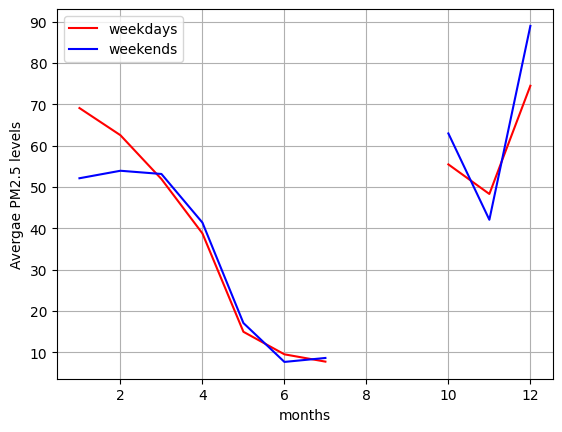

In [9]:
#Q3
#Compare average PM2.5 levels during weekends and weekdays for the station Lal Bahadur Shastri Nagar, Kalaburagi - KSPCB over the year 2021

data_file = pd.read_csv('Data.csv')
data_2021 = data_file[data_file['Timestamp'].str.contains('2021')]
data_stn_2021 = data_2021[data_2021['station'] == 'Lal Bahadur Shastri Nagar, Kalaburagi - KSPCB']


data_stn_2021['month'] = pd.to_datetime(data_stn_2021['Timestamp']).dt.month

weekdays_data = data_stn_2021[pd.to_datetime(data_stn_2021['Timestamp']).dt.weekday<5]
weekend_data = data_stn_2021[pd.to_datetime(data_stn_2021['Timestamp']).dt.weekday>=5]
grouped_weekdays_avg = weekdays_data.groupby('month')['PM2.5'].mean()
grouped_weekends_avg = weekend_data.groupby('month')['PM2.5'].mean()

fig, ax = plt.subplots()
ax.plot([x for x in range(1,13)], grouped_weekdays_avg, label = 'weekdays', color = 'r')
ax.plot([x for x in range(1,13)], grouped_weekends_avg, label = 'weekends', color = 'b')
ax.legend()
ax.grid(True)
ax.set_xlabel('months')
ax.set_ylabel('Avergae PM2.5 levels')
plt.show()

# SPATIO-TEMPORAL AGGREGATION

In [10]:
#Q1
#For each state, calculate the percentage increase or decrease in PM2.5 levels during monsoon months (June to September) 
# compared to summer months (March to May). Which state has the most difference (increase or decrease) for the year 2022?

data_file = pd.read_csv('Data.csv')
data_2022 = data_file[pd.to_datetime(data_file['Timestamp']).dt.year == 2022]
avg_monsoon_data = data_2022[pd.to_datetime(data_2022['Timestamp']).dt.month.isin([6,7,8,9])].groupby('state')['PM2.5'].mean()
avg_summer_data = data_2022[pd.to_datetime(data_2022['Timestamp']).dt.month.isin([3,4,5])].groupby('state')['PM2.5'].mean()

avg_pm25 = pd.DataFrame({'summer': avg_summer_data, 'monsoon': avg_monsoon_data})
avg_pm25['difference'] = (avg_pm25['monsoon'] - avg_pm25['summer'])/(avg_pm25['summer']) * 100
max_pct_change = avg_pm25['difference'].idxmax()

print(max_pct_change)

Jammu and Kashmir


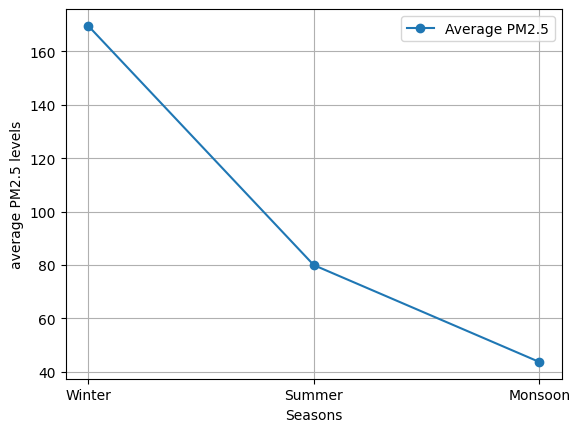

Seasonal variation observed is that there is a drop in pollution from winter to summer to monsoon.


In [11]:
#Q3
#Plot the average PM2.5 levels for Delhi across each season (Winter: December-February, Summer: March-May, Monsoon: June-September) from 
# 2017 to 2023. What seasonal variation, if any, can you observe in pollution levels?

data_file = pd.read_csv('Data.csv')
data_file['Timestamp'] = pd.to_datetime(data_file['Timestamp'])
data_2017_to_2023 = data_file[data_file['Timestamp'].dt.year.isin([2017,2018,2019,2020,2021,2022,2023])]
delhi_data = data_2017_to_2023[data_2017_to_2023['state'] == 'Delhi']

winter_data = delhi_data[delhi_data['Timestamp'].dt.month.isin([12,1,2])]['PM2.5'].mean()
summer_data = delhi_data[delhi_data['Timestamp'].dt.month.isin([5,3,4])]['PM2.5'].mean()
monsoon_data = delhi_data[delhi_data['Timestamp'].dt.month.isin([6,7,8,9])]['PM2.5'].mean()

seasons = ['Winter', 'Summer', 'Monsoon']
avg_pm25 = [winter_data, summer_data, monsoon_data]

fig, ax = plt.subplots()
ax.plot(seasons, avg_pm25, label='Average PM2.5', marker='o')
ax.set_xlabel('Seasons')
ax.set_ylabel('average PM2.5 levels')
ax.legend()
ax.grid(True)
plt.show()

print("""Seasonal variation observed is that there is a drop in pollution from winter to summer to monsoon.""")

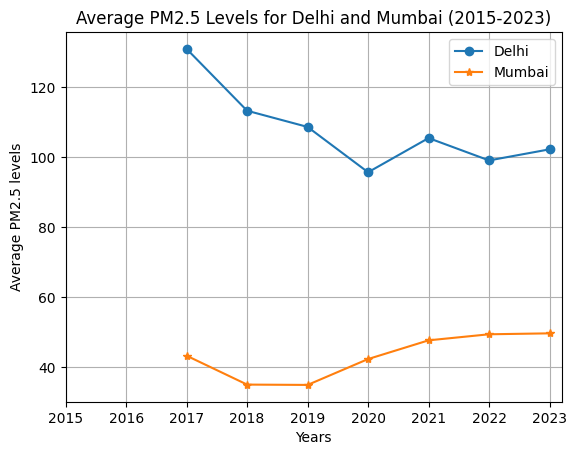

Delhi had more fluctuation - 11.717413923558443


In [28]:
#Q3
#Plot a time-series graph comparing Delhi’s PM2.5 levels with Mumbai’s from 2015 to 2023. Which city had more fluctuations? 
# (Hint: Think what fluctuation means)
data_file = pd.read_csv('Data.csv')

del_bom = data_file[data_file['city'].isin(['Delhi', 'Mumbai'])]
to_dt = pd.to_datetime(del_bom['Timestamp'])

years = [x for x in range(2015,2024)]
del_bom_15_23 = del_bom[to_dt.dt.year.isin(years)]
delhi = del_bom_15_23[del_bom_15_23['city'] == 'Delhi'].groupby(pd.to_datetime(del_bom_15_23['Timestamp']).dt.year)['PM2.5'].mean()
mumbai = del_bom_15_23[del_bom_15_23['city'] == 'Mumbai'].groupby(pd.to_datetime(del_bom_15_23['Timestamp']).dt.year)['PM2.5'].mean()

fig, ax = plt.subplots()
ax.plot(delhi.index, delhi.values, marker = 'o', label = 'Delhi')
ax.plot(mumbai.index, mumbai.values, marker = '*', label = 'Mumbai')
ax.legend()
ax.set_xlabel('Years')
ax.set_ylabel("Average PM2.5 levels")
ax.set_title('Average PM2.5 Levels for Delhi and Mumbai (2015-2023)')
ax.set_xlim(2015,2023.2)
ax.grid(True)
plt.show()

#fluctuation
delhi_fluc = delhi.std()
mumbai_fluc = mumbai.std()
if delhi_fluc > mumbai_fluc:
    print(f'Delhi had more fluctuation - {delhi_fluc}' )
else:
    print(f'Mumbai had more fluctuation - {mumbai_fluc}' )
    

# POPULATION BASED

In [46]:
#Q1
#Which state in India has the highest number of monitoring stations relative to its population? 
population = pd.read_csv("State_data.csv")
data = pd.read_csv('Data.csv')

stations_count = data.groupby('state')['station'].nunique()

population.set_index('State', inplace = True)
merged = stations_count.to_frame('stations_count').join(population, how = 'inner')

merged['ratio'] = merged['stations_count']/merged['Population']
max_stations = merged['ratio'].idxmax()

print(max_stations, 'has the highest number of monitoring stations relative to its population')

Chandigarh has the highest number of monitoring stations relative to its population


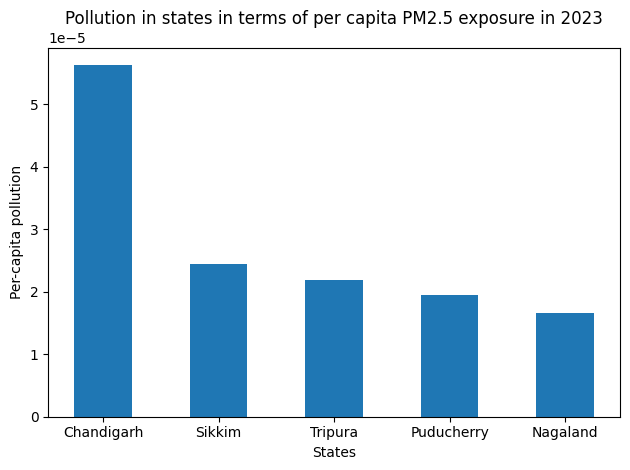

In [72]:
#Q2
#Plot a bar chart showing the top 5 most polluted states in terms of per capita PM2.5 exposure in 2023.
population = pd.read_csv('State_data.csv')
data = pd.read_csv('Data.csv')
data = data[pd.to_datetime(data['Timestamp']).dt.year == 2023]
population.set_index('State', inplace = True)
avg_pollution_state = data.groupby('state')['PM2.5'].mean()
merged = avg_pollution_state.to_frame('avg_pollution_state').join(population, how = 'inner')
merged['per_capita_pollution'] = merged['avg_pollution_state']/merged['Population']
max_pollution = merged['per_capita_pollution'].sort_values().nlargest(5)

fig, ax = plt.subplots()
ax.bar(max_pollution.index, max_pollution.values, width = 0.5)
ax.set_xlabel('States')
ax.set_ylabel('Per-capita pollution')
ax.set_title('Pollution in states in terms of per capita PM2.5 exposure in 2023')
fig.tight_layout()
plt.show()


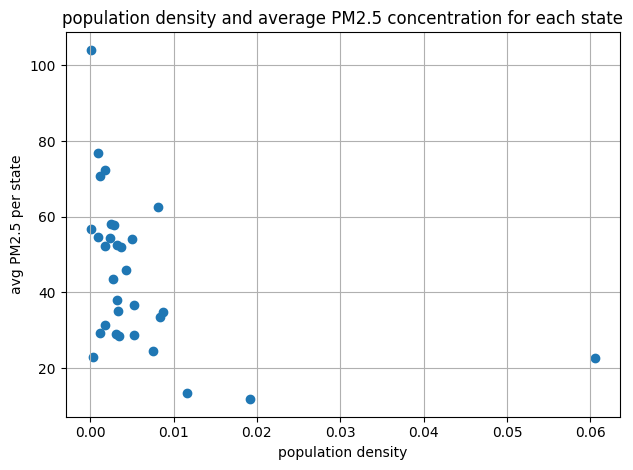

The relationship we can observe is that with increase in population the PM2.5 concentration decreases


In [79]:
#Q3
#Plot the relationship between population density and average PM2.5 concentration for each state. 
# What conclusion can you draw about the correlation between population density and pollution
population = pd.read_csv('State_data.csv')
data = pd.read_csv('Data.csv')

population.set_index('State', inplace = True)
avg_pm25 = data.groupby('state')['PM2.5'].mean()
population['density'] = population['Area (km2)']/population['Population']

merged = avg_pm25.to_frame('avg_pm25').join(population, how = 'inner')

fig, ax = plt.subplots()
ax.scatter(merged['density'], merged['avg_pm25'])
ax.grid(True)
ax.set_xlabel('population density')
ax.set_ylabel('avg PM2.5 per state')
ax.set_title('population density and average PM2.5 concentration for each state')
fig.tight_layout()
plt.show()

print("The relationship we can observe is that with increase in population the PM2.5 concentration decreases")

# AREA BASED


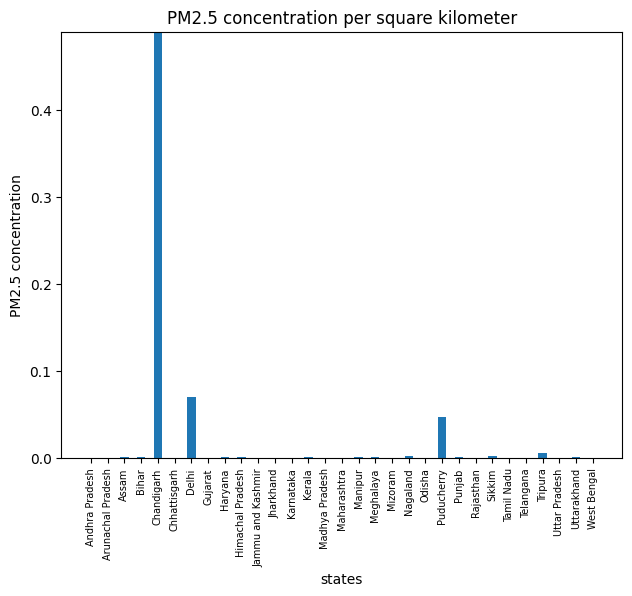

Chandigarh has the highest PM2.5 concentration per square kilometer.


In [102]:
#Q1
#Which state has the highest PM2.5 concentration per square kilometer? Plot the pollution levels for all states relative to their area.
data = pd.read_csv('Data.csv')
population = pd.read_csv('State_data.csv')

population.set_index('State', inplace = True)
pm25_state = data.groupby('state')['PM2.5'].mean()

merged = pm25_state.to_frame('avg_pm25').join(population, how = 'inner')
merged['pm25_per_area'] = merged['avg_pm25']/merged['Area (km2)']

fig, ax = plt.subplots()
ax.bar(merged.index, merged['pm25_per_area'], width = 0.5)
fig.tight_layout()
ax.tick_params(axis='x', rotation=90, labelsize = 7)
ax.set_xlabel('states')
ax.set_ylabel('PM2.5 concentration')
ax.set_title('PM2.5 concentration per square kilometer')
ax.set_ylim(0,0.49)
plt.show()

max_pm25_conc = merged['pm25_per_area'].idxmax()
print(max_pm25_conc, 'has the highest PM2.5 concentration per square kilometer.')

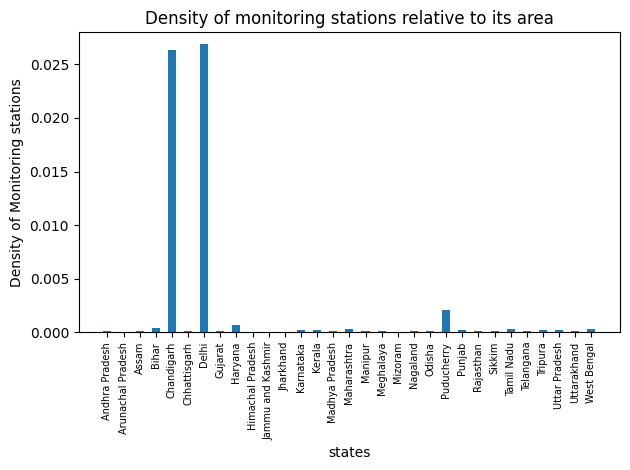

In [116]:
#Q2
# Compare the total number of monitoring stations per square kilometer in each state. Identify the state with the highest density of 
# monitoring stations relative to its area. Show a bar plot where each bar represents a state, and the height shows the number of monitoring 
# stations per square kilometer.
data = pd.read_csv('Data.csv')
population = pd.read_csv('State_data.csv')

population.set_index('State', inplace = True)
stn_data = data.groupby('state')['station'].nunique()

merged = stn_data.to_frame('no_of_stations_pr_state').join(population, how = 'inner')
merged['density_monitoring_stn'] = merged['no_of_stations_pr_state']/merged['Area (km2)']

fig, ax = plt.subplots()
ax.bar(merged.index, merged['density_monitoring_stn'], width = 0.5)
ax.set_xlabel('states')
ax.set_ylabel('Density of Monitoring stations')
ax.set_title('Density of monitoring stations relative to its area')
ax.tick_params(axis = 'x', rotation = 90, labelsize = 7)
ax.set_ylim(0,0.028)
fig.tight_layout()
plt.show()

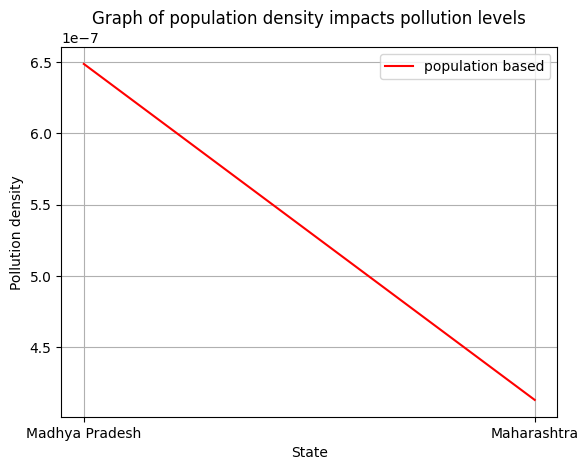

In [128]:
##################
##################
##################
##################
#Q3
# Compare the average PM2.5 levels between Maharashtra and Madhya Pradesh over the year 2021. Given that both states have similar area 
# sizes but different population densities, analyze how population density impacts pollution levels in these two states.
data = pd.read_csv('Data.csv')
population = pd.read_csv('State_data.csv')

data_2021 = data[pd.to_datetime(data['Timestamp']).dt.year == 2021]
pm25_avg = data_2021.groupby('state')['PM2.5'].mean()
population.set_index('State', inplace = True)
merged_data = pm25_avg.to_frame('pm25_avg').join(population, how = 'inner')
merged_data['pm25 population'] = merged_data['pm25_avg']/merged_data['Population']
mh_and_mp = merged_data.loc[merged_data.index.isin(['Maharashtra', 'Madhya Pradesh'])]


fig, ax = plt.subplots()
ax.plot(mh_and_mp.index, mh_and_mp['pm25 population'], label = 'population based', color = 'r')
ax.set_xlabel('State')
ax.set_ylabel('Pollution density')
ax.set_title('Graph of population density impacts pollution levels')
ax.grid(True)
ax.legend()
plt.show()


print('')

# FUNDING BASED

In [158]:
#Q1
#Compare the average PM2.5 levels between states that received NCAP funding and those that did not in 2021.
data = pd.read_csv('Data.csv')
ncap = pd.read_csv('NCAP_Funding.csv')
ncap['Amount released during FY 2021-22'] = pd.to_numeric(ncap['Amount released during FY 2021-22'], errors='coerce')
data_2021 = data[pd.to_datetime(data['Timestamp']).dt.year == 2021]
data_2021_states = data_2021.groupby('state')['PM2.5'].mean()
data_2021_states = data_2021_states.to_frame('avg_pm25')

ncap_gpby_state = ncap.groupby('State')['Amount released during FY 2021-22'].mean()
no_funding = ncap_gpby_state[ncap_gpby_state.isna()]
funding = ncap_gpby_state[~ncap_gpby_state.isna()]

avg_pm25_funding = funding.values.mean()

avg_pm25_no_funding = no_funding.values.mean()

print("Average PM2.5 for states that received NCAP funding in 2021:", avg_pm25_funding)
print("Average PM2.5 for states that did not receive NCAP funding in 2021:", avg_pm25_no_funding)

Average PM2.5 for states that received NCAP funding in 2021: 3.050369408369409
Average PM2.5 for states that did not receive NCAP funding in 2021: nan


In [187]:
#Q2
# Create a time series plot showing PM2.5 levels with an increment in NCAP funding for Assam. Has an increment of the financing led to 
# noticeable improvements in air quality?
data = pd.read_csv('Data.csv')
ncap = pd.read_csv('NCAP_Funding.csv')

data['Timestamp'] = pd.to_datetime(data['Timestamp'], errors='coerce') 
x = [2019,2020,2021]
data = data[pd.to_datetime(data['Timestamp']).dt.year.isin(x)]
assam_data = data[data['state'] == 'Assam']
assam_data['Year'] = assam_data['Timestamp'].dt.year
assam_pm25_avg = assam_data.groupby('Year')['PM2.5'].mean()

assam_funding = ncap[ncap['State'] == 'Assam'][['State', 'Amount released during FY 2021-22', 'Amount released during FY 2020-21','Amount released during FY 2019-20']]
assam_funding['Year'] = [2019, 2020, 2021]
merged_data = assam_pm25_avg.join(assam_funding, how = 'inner')

C:\Users\Dhruv Gupta\AppData\Local\Temp\ipykernel_13340\2600034782.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  assam_data['Year'] = assam_data['Timestamp'].dt.year


ValueError: Length of values (3) does not match length of index (5)

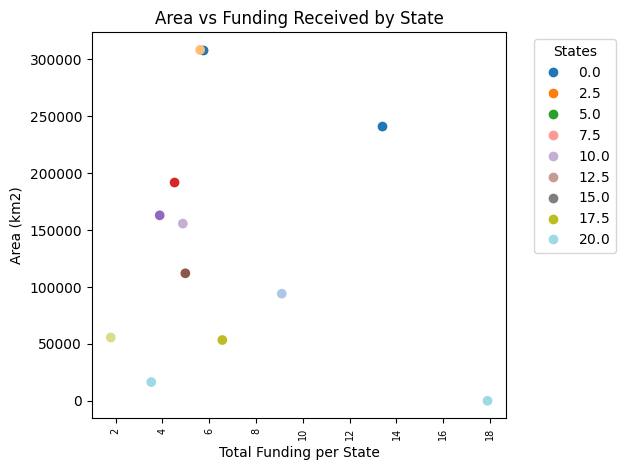

In [211]:
#Q3
# Create a scatter plot to showcase the area versus funding received by a state. Mark every state with a different color and show 
# the legend outside the plot.
population = pd.read_csv('State_data.csv')
ncap = pd.read_csv('NCAP_Funding.csv')

x = ['Amount released during FY 2019-20','Amount released during FY 2020-21','Amount released during FY 2021-22']
ncap[x] = ncap[x].apply(pd.to_numeric, errors='coerce')
ncap_state = ncap.groupby('State')[x].mean()
ncap_state['Total Fund per state'] = ncap_state['Amount released during FY 2019-20'] + ncap_state['Amount released during FY 2020-21'] + ncap_state['Amount released during FY 2021-22']
population.set_index('State', inplace = True)
merged = population.join(ncap_state, how = 'inner')

fig, ax = plt.subplots()
scatter = ax.scatter(merged['Total Fund per state'], merged['Area (km2)'], c=range(len(merged)), cmap='tab20')
ax.tick_params(axis = 'x', rotation = 90, labelsize = 7)
handles, labels = scatter.legend_elements()
ax.legend(handles, labels, title="States", bbox_to_anchor=(1.05, 1), loc='upper left')
ax.set_xlabel('Total Funding per State')
ax.set_ylabel('Area (km2)')
ax.set_title('Area vs Funding Received by State')
plt.tight_layout()
plt.show()

# Miscellaneous Questions

In [7]:
#Q1
#For the most polluted city in 2023 (highest average pollution in 2023), calculate the percentage of days with PM2.5 levels above the
# hazardous threshold (300 µg/m³)

data = pd.read_csv('Data.csv')
data['Timestamp'] = pd.to_datetime(data['Timestamp'], errors = 'coerce')
data_2023 = data[pd.to_datetime(data['Timestamp']).dt.year == 2023]
avg_pol = data_2023.groupby('city')['PM2.5'].mean()
city_w_max_pol = avg_pol.idxmax()

data_city_w_max_poll = data_2023[data_2023['city'] == city_w_max_pol]
pollution_gt_thn_300 = data_city_w_max_poll[data_city_w_max_poll['PM2.5'] > 300]

pct_days_lvl_abv_300 = pollution_gt_thn_300['Timestamp'].dt.date.nunique()/data_city_w_max_poll['Timestamp'].dt.date.nunique()*100
print(pct_days_lvl_abv_300, "is the percentage of days over the hazardous threshold of 300")

0.821917808219178 is the percentage of days over the hazardous threshold of 300


C:\Users\Dhruv Gupta\AppData\Local\Temp\ipykernel_46684\4032769874.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_delhi['days'] = data_delhi['Timestamp'].dt.day
C:\Users\Dhruv Gupta\AppData\Local\Temp\ipykernel_46684\4032769874.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_delhi['months'] = data_delhi['Timestamp'].dt.month
C:\Users\Dhruv Gupta\AppData\Local\Temp\ipykernel_46684\4032769874.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.

The percentage change in air pollution PM2.5 during diwali is  83.68647152428552
The percentage change in air pollution PM2.5 during new year is  137.6090600976979


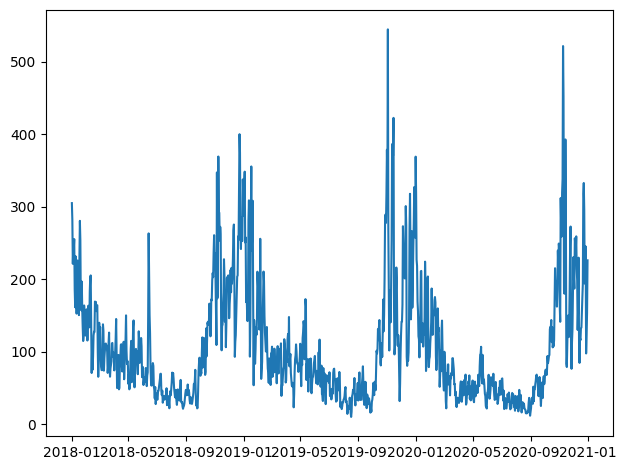

In [20]:
# Q2
# Analyze the PM2.5 levels in Delhi during Diwali (October-November) and New Year compared to regular months over the 3 years (2018-2020).
# Do you observe any significant pollution spikes during these festivals? If spikes are observed, Can you mark these spikes using arrows?

data = pd.read_csv('Data.csv')
data['Timestamp'] = pd.to_datetime(data['Timestamp'], errors = 'coerce')
data_3years = data[data['Timestamp'].dt.year.isin([2018, 2019, 2020])]
data_delhi = data_3years[data_3years['city'] == 'Delhi']
data_delhi['days'] = data_delhi['Timestamp'].dt.day
data_delhi['months'] = data_delhi['Timestamp'].dt.month
data_delhi['years'] = data_delhi['Timestamp'].dt.year

diwali = data_delhi[data_delhi['months'].isin([10,11])]
new_year = data_delhi[(data_delhi['months'] == 12) & (data_delhi['days'].isin([1,31]))]
regular_months = data_delhi[(data_delhi['months'].isin([2, 3, 4, 5, 6, 7, 8, 9])) | 
                            ((data_delhi['months'] == 1) & (data_delhi['days'] > 1)) |
                            ((data_delhi['months'] == 12) & (data_delhi['days'] < 31))]
avg_pm25_diwali = diwali['PM2.5'].mean()
avg_pm25_ny = new_year['PM2.5'].mean()
avg_pm25_reg = regular_months['PM2.5'].mean()

pct_diwali = (avg_pm25_diwali-avg_pm25_reg)/avg_pm25_reg * 100
pct_ny = (avg_pm25_ny-avg_pm25_reg)/avg_pm25_reg * 100

print('The percentage change in air pollution PM2.5 during diwali is ', pct_diwali)
print('The percentage change in air pollution PM2.5 during new year is ', pct_ny)

fig, ax = plt.subplots()
ax.plot(data_delhi.groupby(data_delhi['Timestamp'].dt.date)['PM2.5'].mean(), label="PM2.5 Daily Average")
plt.tight_layout()
